In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [41]:
df = pd.read_csv('../Data/Howell1.csv', sep=';', header=0)
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [24]:
df1 = df[df.age >= 18]
height_bar = df1.height.mean()
df1['height_c'] = df1.height - height_bar

In [12]:
with pm.Model() as q1_model:
    # specify the data
    height_c = pm.Data('height_c', df1.height_c)
    
    # specify the model
    alpha = pm.Normal('alpha', mu=45, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    weight = pm.Normal('weight', mu=alpha + beta * height_c, sd=sigma, observed=df1.weight)
    
    # find the posterior distribution of the weight
    trace1 = pm.sample(1000)

/var/folders/fj/bhcysmkn4zd5drry1lzgry9m0000gn/T/ipykernel_36270/3122674939.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (

/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 276 seconds.


In [29]:
with q1_model:
    # Take samples from posterior predictive
    pm.set_data({'height_c': np.array([140, 160, 175]) - height_bar})
    spp = pm.sample_posterior_predictive(trace1)

In [35]:
sim['weight'].mean(axis = 0)

array([35.83125095, 48.43621667, 57.78354914])

In [30]:
pm.hdi(sim['weight'], 0.89)

array([[28.55487494, 42.26982537],
       [41.87521305, 55.12698667],
       [50.41575906, 64.09600763]])

Question 2:

In [43]:
df2 = df[df.age < 13]

Text(0, 0.5, 'weight')

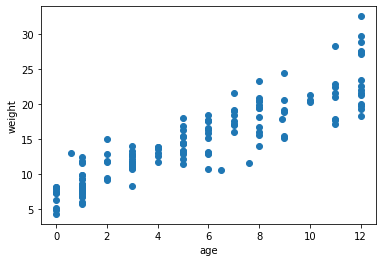

In [61]:
plt.scatter(df2.age, df2.weight)
plt.xlabel('age')
plt.ylabel('weight')

In [52]:
with pm.Model() as q2_model:
    # specify the data
    age = pm.Data('age', df2.age)
    
    # specify the model (prior predictive analysis comes after defining priors)
    alpha = pm.Normal('alpha', mu=3.5, sd=1) # avg. birth weight 3.5kg
    beta = pm.HalfNormal('beta', sd=1) # half normal since increase in age can only have positive effect on growth
    sigma = pm.HalfNormal('sigma', sd=1)
    weight = pm.Normal('weight', mu=alpha + beta * age, sd=sigma, observed=df2.weight)

/var/folders/fj/bhcysmkn4zd5drry1lzgry9m0000gn/T/ipykernel_36270/953299176.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and wi

/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:3167: RuntimeWarning: overflow encountered in double_scalars
  return x * x
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in impl (

'\nAn alternative way to generate samples from the prior for alpha and beta:\n\nalpha_samples = stats.norm.rvs(loc=3.5, scale=1, size=10)\nbeta_samples = stats.halfnorm.rvs(scale=1, size=10)\n\nfor alpha, beta in zip(alpha_samples, beta_samples):\n    weight_samples = alpha + beta*df2.age\n    plt.plot(df2.age, weight_samples)\n'

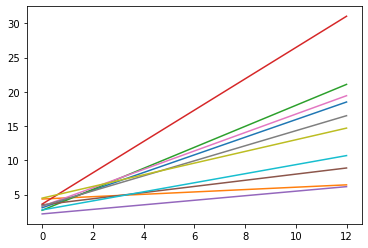

In [82]:
with q2_model:
    # prior predictive simulation
    prior_samples = pm.sample_prior_predictive(samples=10)

# Generate samples from the prior predictive distribution for y
for alpha, beta in zip(prior_samples['alpha'], prior_samples['beta']):
    weight_samples = alpha + beta*df2.age
    plt.plot(df2.age, weight_samples)
    
"""
An alternative way to generate samples from the prior for alpha and beta:

alpha_samples = stats.norm.rvs(loc=3.5, scale=1, size=10)
beta_samples = stats.halfnorm.rvs(scale=1, size=10)

for alpha, beta in zip(alpha_samples, beta_samples):
    weight_samples = alpha + beta*df2.age
    plt.plot(df2.age, weight_samples)
"""

In [ ]:
with q2_model:
    # find the posterior distribution of the weight
    trace2 = pm.sample(1000)

In [83]:
pm.summary(trace2, hdi_prob=0.89)

/Users/elisevans/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,7.018,0.354,6.447,7.586,0.009,0.006,1634.0,1746.0,1.0
beta,1.392,0.055,1.300,1.475,0.001,0.001,1605.0,1668.0,1.0
sigma,2.518,0.149,2.286,2.760,0.003,0.002,2076.0,1946.0,1.0
